# Introduction

I recently read the book "Blood, Sweat, and Pixels" by Jason Schreier. It was an excellent book that introduced me to the relationship between game publishers and developers. One of the more interesting things about game design was how publishers tied bonuses to Metacritic reviews. I wanted to see if there was a relationship between reviews and game sales.

The sales data set comes from a web scrape performed on Kaggle. It's fairly clean and required minimal cleaning. The source data can be downloaded here : 
https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings

# Data Exploration

In [34]:
# Import the necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

Populating the interactive namespace from numpy and matplotlib


In [35]:
raw_data = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
raw_data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


The dataset has information going back to 1980. In that time, consoles have come and gone, distribution channels have changed, macroeconomics have had different impact on the world. To make this analysis simpler, I'm only going to focus on the most recent five years for which data is available (2012-2016)

In [36]:
data = raw_data[(raw_data['Year_of_Release'] <= 2016) & (raw_data['Year_of_Release'] >= 2012)]
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.02,9.09,0.98,3.96,21.04,97.0,50.0,8.2,3994.0,Rockstar North,M
23,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.66,5.14,0.06,1.41,16.27,97.0,58.0,8.1,3711.0,Rockstar North,M
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,6.03,5.86,0.36,2.38,14.63,NaN,NaN,NaN,NaN,NaN,NaN
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,Nintendo,5.28,4.19,4.35,0.78,14.60,NaN,NaN,NaN,NaN,NaN,NaN
34,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,4.99,5.73,0.65,2.42,13.79,83.0,21.0,5.3,922.0,Treyarch,M


# Data Analysis

## Q1 : Which game publishers were the most prolific?

In [37]:
top_n = 5
top_volume = list(data.groupby('Publisher')['Name'].count().nlargest(top_n))
top_publishers = list(data.groupby('Publisher')['Name'].count().nlargest(top_n).index)

In [38]:
print (top_volume)
print (top_publishers)

[332, 185, 182, 163, 120]
['Namco Bandai Games', 'Activision', 'Electronic Arts', 'Ubisoft', 'Nintendo']


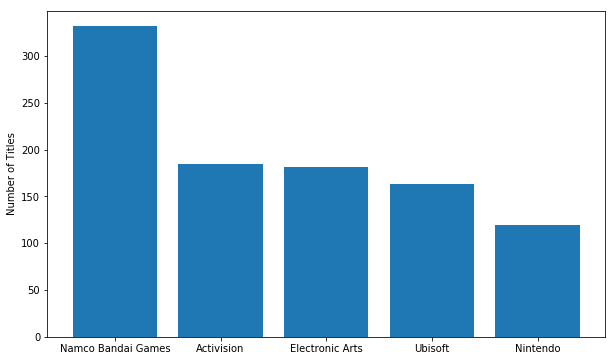

In [40]:
x_vals = [i for i in range(len(top_volume))]
plt.bar(x_vals, top_volume)
plt.xticks(x_vals, top_publishers, rotation=0)
plt.ylabel("Number of Titles")
plt.show()

Holy cow! That's a lot of video games, expecially from Namco Bandai. A total of 332 games in five years! That's a lot of programming, art, and storytelling effort to fund in such a short amount of time.

# Q2 : How many games did they sell?

In [60]:
publisher_sales = data[data['Publisher'].isin(top_publishers)].groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False)
publisher_sales

Publisher
Electronic Arts       218.57
Nintendo              197.82
Activision            187.67
Ubisoft               129.52
Namco Bandai Games     59.11
Name: Global_Sales, dtype: float64

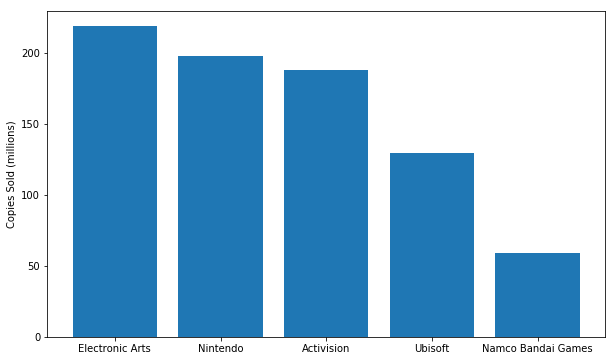

In [65]:
publisher_sales_list = list(publisher_sales.index)

x_vals = [i for i in range(len(publisher_sales))]
plt.bar(x_vals, publisher_sales)
plt.xticks(x_vals, publisher_sales_list, rotation=0)
plt.ylabel("Copies Sold (millions)")
plt.show()


Interestingly, publishing a lot of games did not result directly in higher sales. Despite publishing fewer games, EA and Nintendo ranked higher in total games sold. I was particularly curious to learn why Bandai Namco ranked last, even though it published almost 2x the number of games compared to its closest competitor.

In [44]:
data[data['Publisher'] == 'Namco Bandai Games']['Global_Sales'].describe()

count    332.000000
mean       0.178042
std        0.313464
min        0.010000
25%        0.030000
50%        0.080000
75%        0.190000
max        3.970000
Name: Global_Sales, dtype: float64

In [45]:
data[data['Publisher'] == 'Namco Bandai Games'].groupby('Platform').count()['Name']

Platform
3DS     76
DS       3
PC       7
PS3     79
PS4     34
PSP     40
PSV     45
Wii      6
WiiU    13
X360    20
XOne     9
Name: Name, dtype: int64

Upon closer inspection, it seems that 50% of it games sold <= 80,000 units. These were likely lower quality games from independent developers who needed help marketing and distributing their games. It's also interesting to note that >90 of the games published by Namco Bandai were for the Sony PSP and Vita consoles, which had small install bases in the market.

# Q3 : What was their overall market share?

In [47]:
data['Global_Sales'].sum()

1446.7399999999607

In [48]:
data[data['Publisher'].isin(top_publishers)].groupby('Publisher')['Global_Sales'].sum() / data['Global_Sales'].sum()

Publisher
Activision            0.129719
Electronic Arts       0.151078
Namco Bandai Games    0.040857
Nintendo              0.136735
Ubisoft               0.089525
Name: Global_Sales, dtype: float64

In [55]:
(data[data['Publisher'].isin(top_publishers)].groupby('Publisher')['Global_Sales'].sum() / data['Global_Sales'].sum()).sum()

0.5479146218394609

Out of the approximately 1.5 billion games sold during this period, only 54% were published by the top publishers in the industry. I'd say that's a pretty good indication of healthy competition.

# Q4 : What were the top games for each of these publishers?

In [57]:
for publisher in top_publishers:
    print (publisher + " :")
    print (data[data['Publisher'] == publisher].groupby('Name')['Global_Sales'].sum().nlargest(5))
    print ("\n")

Namco Bandai Games :
Name
The Witcher 3: Wild Hunt                    6.00
Dark Souls II                               3.01
Dragon Ball: XenoVerse                      2.15
Dark Souls III                              2.11
Naruto Shippuden: Ultimate Ninja Storm 3    1.44
Name: Global_Sales, dtype: float64


Activision :
Name
Call of Duty: Black Ops II        29.40
Call of Duty: Ghosts              27.40
Call of Duty: Black Ops 3         25.68
Call of Duty: Advanced Warfare    21.99
Destiny                           12.55
Name: Global_Sales, dtype: float64


Electronic Arts :
Name
FIFA 15           17.34
FIFA 14           16.48
FIFA 16           16.30
FIFA Soccer 13    15.96
Battlefield 4     13.93
Name: Global_Sales, dtype: float64


Ubisoft :
Name
Assassin's Creed III               13.02
Assassin's Creed IV: Black Flag    13.02
Watch Dogs                          9.19
Just Dance 4                        8.74
Far Cry 4                           8.49
Name: Global_Sales, dtype: float64




It's extremely interesting to me that all three western publishers (Activision, Electronic Arts, and Ubisoft) rely heavily on sequels to make up the bulk of their sales. In the case of Activision and EA, the bulk of their sales come from one franchise (Call of Duty and FIFA, respectively).

# Q5 : What was the relationship between the metacritic scores and sales?

In [ ]:
data[data['Publisher'].isin(top_five_publishers)]

In [ ]:
user_score = list(data[data['Publisher'].isin(top_five_publishers)]['User_Score'])
critic_score = list(data[data['Publisher'].isin(top_five_publishers)]['Critic_Score'])
global_sales = list(data[data['Publisher'].isin(top_five_publishers)]['Global_Sales'])

In [ ]:

# rel = data.plot(x=critic_score, y=global_sales)
plt.scatter(critic_score, global_sales)

In [ ]:
data['User_Score'].fillna(0.0, inplace=True)

In [ ]:
data[data['User_Score'] == 'tbd']

# Q6 : What was the relationship between the user scores and sales?

In [ ]:
# %pylab inline
# rel = data.plot(x=critic_score, y=global_sales)
plt.scatter(user_score, global_sales)

# Q7 : What is the relationship between metacritic scores and user scores?

In [ ]:
%pylab inline
# rel = data.plot(x=critic_score, y=global_sales)
plt.scatter(critic_score, user_score)

In [ ]:
data[(data['Platform'] == 'Wii')].groupby('Publisher')['Name'].count().sum()
# results[(results['recipient_candidate_name'] == 'POIZNER, STEVE')].groupby('donor_name').sum().sort_values('transaction_amount', ascending = False)

In [ ]:
data[(data['Platform'] == 'Wii')].groupby('Publisher').get_group('Ubisoft')

In [ ]:
data[(data['Platform'] == 'Wii') & (data['Publisher'] == 'Ubisoft')].groupby(['Genre', 'Year_of_Release']).count()['Name']

In [ ]:
(data['Platform'] == 'Wii') & (data['Publisher'] == 'Ubisoft')

In [ ]:
data[(data['Platform'] == 'Wii') | (data['Platform'] == 'X360') | (data['Platform'] == 'PS3')]

In [ ]:
data['Platform']

In [ ]:
data.head()

In [ ]:
qua = data.groupby('Platform').sum()['Global_Sales']

In [ ]:
qua[qua>100]

What are the top publishers in this dataset?

In [ ]:
# data.groupby('Publisher').count()['Name'].sort_values(ascending=False).iloc[0:10]
data.groupby('Publisher').count()['Name'].nlargest(5).index

In [ ]:
data[publisher_filter]['Name'].count()

In [ ]:
data[data['Publisher'].isin(['Activision', 'Nintendo'])]